***BARILLER Halvard*** <br>
***MVA 23/24***

# <center> Convex Optimization 
## <center> Homework 3 - LASSO

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

(CVXPY) Nov 19 11:40:40 PM: Encountered unexpected exception importing solver SCS:
ImportError("dlopen(/opt/homebrew/lib/python3.11/site-packages/_scs_direct.cpython-311-darwin.so, 0x0002): tried: '/opt/homebrew/lib/python3.11/site-packages/_scs_direct.cpython-311-darwin.so' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64')), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/lib/python3.11/site-packages/_scs_direct.cpython-311-darwin.so' (no such file), '/opt/homebrew/lib/python3.11/site-packages/_scs_direct.cpython-311-darwin.so' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64'))")


**Dual problem** <br>

Given $x_1,\dots,x_n \in \mathbb{R}^d$ data vectors and their associated observations $y_1,\dots,y_n \in \mathbb{R}$, we consider the following optimization problem in $w \in \mathbb{R}^d$:
\begin{equation}
\tag{$LASSO$}
\min_w f(w) = \frac{1}{2} \|Xw-y\|_2^2 + \lambda \|w\|_1
\end{equation}
where $\lambda > 0$ is a regularization parameter. <br>

We make the change of variable $z = Xw-y$ and we consider the equivalent problem:
\begin{equation}
\tag{$LASSO_{eq}$}
\min_{w,z} f(w,z) = \frac{1}{2} \|z\|_2^2 + \lambda \|w\|_1 \quad \text{subject to} \quad z = Xw-y
\end{equation}
After having the problem in standard form, we can write the associated Lagrangian:
\begin{equation*}
\mathcal{L}(w,z,\alpha) = \frac{1}{2} \|z\|_2^2 + \lambda \|w\|_1 + \alpha^T(Xw-y-z)
\end{equation*}
where $\alpha \in \mathbb{R}^n$ is the vector of Lagrange multipliers. <br>
The dual function is then given by:
\begin{align*}
g(\alpha) = \inf_{w,z} \mathcal{L}(w,z,\alpha) & = \inf_{w,z} \left( \frac{1}{2} \|z\|_2^2 + \lambda \|w\|_1 + \alpha^T(Xw-y-z) \right) \\
& = \inf_z \left( \frac{1}{2} \|z\|_2^2 - \alpha^Tz \right) + \inf_w \left( \lambda \|w\|_1 + \alpha^TXw \right) - \alpha^Ty \\.
\end{align*}
Let $\phi : x \mapsto \frac{1}{2} \|x\|_2^2 - \alpha^Tx$. The function $\phi$ is a positive quadratic form, hence strongly convex and $\mathcal{C}^2$-differentiable. There exists a unique minimizer $z^*$ of $\phi$ given by the first order condition:
\begin{equation*}
\nabla \phi(z^*) = z^* - \alpha = 0 \quad \iff \quad z^* = \alpha.
\end{equation*}
As a consequence, we have:
\begin{equation*}
\inf_z \left( \frac{1}{2} \|z\|_2^2 - \alpha^Tz \right) = \phi(z^*) = \phi(\alpha) = \frac{1}{2} \|\alpha\|_2^2 - \alpha^T\alpha = -\frac{1}{2} \|\alpha\|_2^2.
\end{equation*}
The dual function then becomes:
\begin{align*}
g(\alpha) & = -\frac{1}{2} \|\alpha\|_2^2 + \inf_w \left( \lambda \|w\|_1 + \alpha^TXw \right) - \alpha^Ty \\
& = -\frac{1}{2} \|\alpha\|_2^2 - \alpha^Ty - \sup_w \left(  - \alpha^TXw  - \lambda \|w\|_1 \right) \\
\end{align*}
We recognize in the last term the convex conjugate function $h^* (-X^T\alpha) = \sup_w \left(- \alpha^TXw - h(w)\right)$, with $h(w) = \lambda \|w\|_1$. This gives:
\begin{equation*}
g(\alpha) = -\frac{1}{2} \|\alpha\|_2^2 - \alpha^Ty - h^*(-X^T\alpha).
\end{equation*}
As developed in the lectures and in the previous homework, the convex conjugate of $h$ is given by:
\begin{equation*}
h^*(u) = \sup_w \left( u^Tw - h(w) \right) = 
\begin{cases}
0 & \text{if} \quad \|u\|_{\infty} \leq \lambda \\
+\infty & \text{otherwise}
\end{cases}
\end{equation*}
Therefore, we have:
\begin{equation*}
g(\alpha) = -\frac{1}{2} \|\alpha\|_2^2 - \alpha^Ty - h^*(-X^T\alpha) =
\begin{cases}
-\frac{1}{2} \|\alpha\|_2^2 - \alpha^Ty & \text{if} \quad \|X^T\alpha\|_{\infty} \leq \lambda \\
-\infty & \text{otherwise}
\end{cases}
\end{equation*}
The dual problem is then given by:
\begin{align*}
\tag{$LASSO_{dual}$}
\max_{\alpha} g(\alpha) & = \max_{\alpha} \left( -\frac{1}{2} \|\alpha\|_2^2 - \alpha^Ty \right) \quad \text{subject to} \quad \|X^T\alpha\|_{\infty} \leq \lambda \\
& = \min_{\alpha} \frac{1}{2} \alpha^TI_n\alpha + \alpha^Ty \quad \text{subject to} \quad \|X^T\alpha\|_{\infty} \leq \lambda \\
\end{align*}
Finally, we can write the dual problem with the following form:
\begin{align*}
\tag{$QP$}
\min_{v \in \mathbb{R}^n} v^T Q v + p^T v \quad \text{subject to} \quad Av \preceq b
\end{align*}
where $Q = \frac{1}{2} I_n$, $p = y$ and $A = [X^T, -X^T]$, $b = \lambda \mathbb{1}_n$. <br>

**Barrier method** <br>

Reflecting on the $(QP)$ optimization problem, we will proceed to solve it using the barrier method with logarithmic barrier.

Let $t>0$ be a parameter. We consider the following optimization problem:
\begin{align*}
\min_{v \in \mathbb{R}^n} \enskip f_0(v) + \frac{1}{t} \phi(v) = v^T Q v + p^T v - \frac{1}{t} \sum_{i=1}^{2n} \log(b_i - a_i^Tv)
\end{align*}
where $\phi$ is the (convex) logarithmic barrier s.t. $\mathbf{dom}~\phi = \{v | Av \prec b \}$, and we denote by $a_1^T,\dots,a_{2n}^T$ the rows of the matrix $A$. <br>
The barrier method problem is defined as follows:
\begin{equation*}
\min_v tf_0(v) + \phi(v) = t(v^T Q v + p^T v) - \sum_{i=1}^{2n} \log(b_i - a_i^Tv)
\end{equation*}

The centering step is equivalent to solving the following problem:
\begin{equation*}
\min_v F(v) = t f(v) + \phi(v)
\end{equation*}
with $v$ a given strictly feasible point.
To do so, we will use Newton method. We first begin by deriving the gradient and the Hessian of $F$:
\begin{align*}
\nabla F(v) & = (2Qv + p)t + \sum_{i=1}^{2n} \frac{a_i}{b_i - a_i^Tv} \\
\nabla^2 F(v) & = 2Qt + \sum_{i=1}^{2n} \frac{a_ia_i^T}{(b_i - a_i^Tv)^2}
\end{align*}

# Barrier algorithm

In [2]:
def f_original(v, Q, p):
    return v.T.dot(Q).dot(v) + p.T.dot(v)

In [3]:
def F(v, Q, p, A, b, t):
    if (b - A.dot(v)<=0).any():
        return np.inf
    else:
        return t * (f_original(v, Q, p)) - np.sum(np.log(b - A.dot(v)))

In [4]:
def grad_F(v, Q, p, A, b, t):
    d = 1 / (b - A.dot(v))
    return (2 * Q.dot(v) + p) * t + A.T.dot(d)

In [5]:
def hessian_F(v, Q, p, A, b, t):
    d = 1 / (b - A.dot(v))
    return 2 * Q * t + A.T.dot(np.diag(d.flatten() ** 2)).dot(A)

In [6]:
def backtrack(v, Q, p, A, b, t, alpha, beta, d_v):
    
    assert alpha > 0 and alpha < 0.5, "alpha must be in (0, 0.5)"
    assert beta > 0 and beta < 1, "beta must be in (0, 1)"
    
    # Step size
    step = 1
    f_delta = F(v + step * d_v, Q, p, A, b, t)
    assert f_delta is not None, "v is not in the domain of F"
    f_init = F(v, Q, p, A, b, t)
    assert f_init is not None, "v is not in the domain of F"
    grad = grad_F(v, Q, p, A, b, t)
    i = 0
    while f_delta > f_init + alpha * step * grad.T.dot(d_v):
        i += 1
        step = step * beta
        f_delta = F(v + step * d_v, Q, p, A, b, t)
        if i > 10e5:
            break
    return step

In [7]:
def centering_step(Q, p, A, b, t, v0, eps, alpha, beta):
    """
    Solves with Newton method the centering step.
    Parameters
    ---------------
    Q, p, A, b: Inputs from the (QP) optimization problem.
    t: Barrier method parameter.
    v0: Initial feasible point.
    eps: Precision error for the Newton method.
    Returns
    ---------------
    v_seq: Sequence of feasible points computed by the Newton method.
    """
    v_seq = [v0]
    lamb_sq = 1
    while lamb_sq / 2.0 > eps:
        v = v_seq[-1]
        hess_inv = np.linalg.pinv(hessian_F(v, Q, p, A, b, t))
        d_v = -hess_inv.dot(grad_F(v, Q, p, A, b, t))
        lamb_sq = grad_F(v, Q, p, A, b, t).T.dot(hess_inv).dot(grad_F(v, Q, p, A, b, t))
        step = backtrack(v, Q, p, A, b, t, alpha, beta, d_v)
        v_seq.append(v + step * d_v)
        if len(v_seq) > 10e5:
            break
        # Sanity check that d_v is a descent direction
        assert grad_F(v, Q, p, A, b, t).T.dot(d_v) < 0, "d_v is not a descent direction"

    return v_seq


In [8]:
def barrier_method(v, Q, p, A, b, t, mu, eps, alpha, beta):
    """
    Applies the barrier method to solve the (QP) optimization problem.
    Parameters
    ---------------
    v: Initial feasible point.
    Q, p, A, b: Inputs from the (QP) optimization problem.
    t: Barrier method parameter.
    mu: Barrier method parameter for the update of t.
    eps: Precision error for the Newton method and stopping criterion.
    Returns
    ---------------
    v_iterates: Sequence of feasible points computed by the Newton method.
    inner_iterations: Number of iterations of the Newton method for each outer iteration.
    outer_iterations: Number of outer iterations.
    """
    assert mu > 1, 'mu must be superior to 1'
    assert eps > 0, 'eps must be superior to 0'
    num_constraints = A.shape[0]
    v_iterates = [v]
    outer_iterations = 0
    inner_iterations = []

    while num_constraints / t >= eps:
        outer_iterations += 1
        v_temp = v_iterates[-1]
        # v = centering_step(Q, p, A, b, t, v_temp, eps)[-1]
        v = centering_step(Q, p, A, b, t, v_temp, eps, alpha, beta)
        inner_iterations.append(len(v))
        v = v[-1]
        t = mu * t
        v_iterates.append(v)
        if len(v_iterates) > 10e5:
            break
    return v_iterates, inner_iterations, outer_iterations

# Experiments

In [9]:
# Parameters
alpha = 0.1
beta = 0.7
n = 200
d = 200
eps = 10e-6
lamb = 10
mu = 50
t = 0.2

In [10]:
np.random.seed(1)

# Data generation
X = np.random.rand(n,d)
y = np.random.rand(n)
Q = 0.5*np.eye(n)
p = y
A = np.vstack((X.T,-X.T))
b = lamb*np.ones((2*d))
v0 = np.zeros((n))

## Optimality check with CVXPY

In [11]:
# Solution with the barrier method
v_seq, inner_iterations, outer_iterations = barrier_method(v0, Q, p, A, b, 1, mu, eps, alpha, beta)

In [12]:
# Solution with cvxpy
y = y.flatten()
p = p.flatten()
b = b.flatten()
v0 = np.zeros(n)

v = cp.Variable(n)
objective = cp.Minimize(cp.quad_form(v,Q) + p.T@v)
constraints = [A@v <= b]
prob = cp.Problem(objective, constraints)
prob.solve()
print("status:", prob.status)
# print("optimal value", prob.value)
# print("optimal var", v.value)

print("Difference between cvxpy's and barrier method's optimal elements: ", np.linalg.norm(v.value - v_seq[-1]))
print("Difference between cvxpy's and barrier method's optimal values: ", np.abs(prob.value - f_original(v_seq[-1], Q, p)))

status: optimal
Difference between cvxpy's and barrier method's optimal elements:  0.00033595419511820655
Difference between cvxpy's and barrier method's optimal values:  3.578202303344824e-06


## Numerical Results

mu =  2 , number of outer iterations =  28
mu =  5 , number of outer iterations =  12
mu =  10 , number of outer iterations =  9
mu =  15 , number of outer iterations =  8
mu =  30 , number of outer iterations =  6
mu =  50 , number of outer iterations =  5
mu =  100 , number of outer iterations =  5
mu =  500 , number of outer iterations =  4


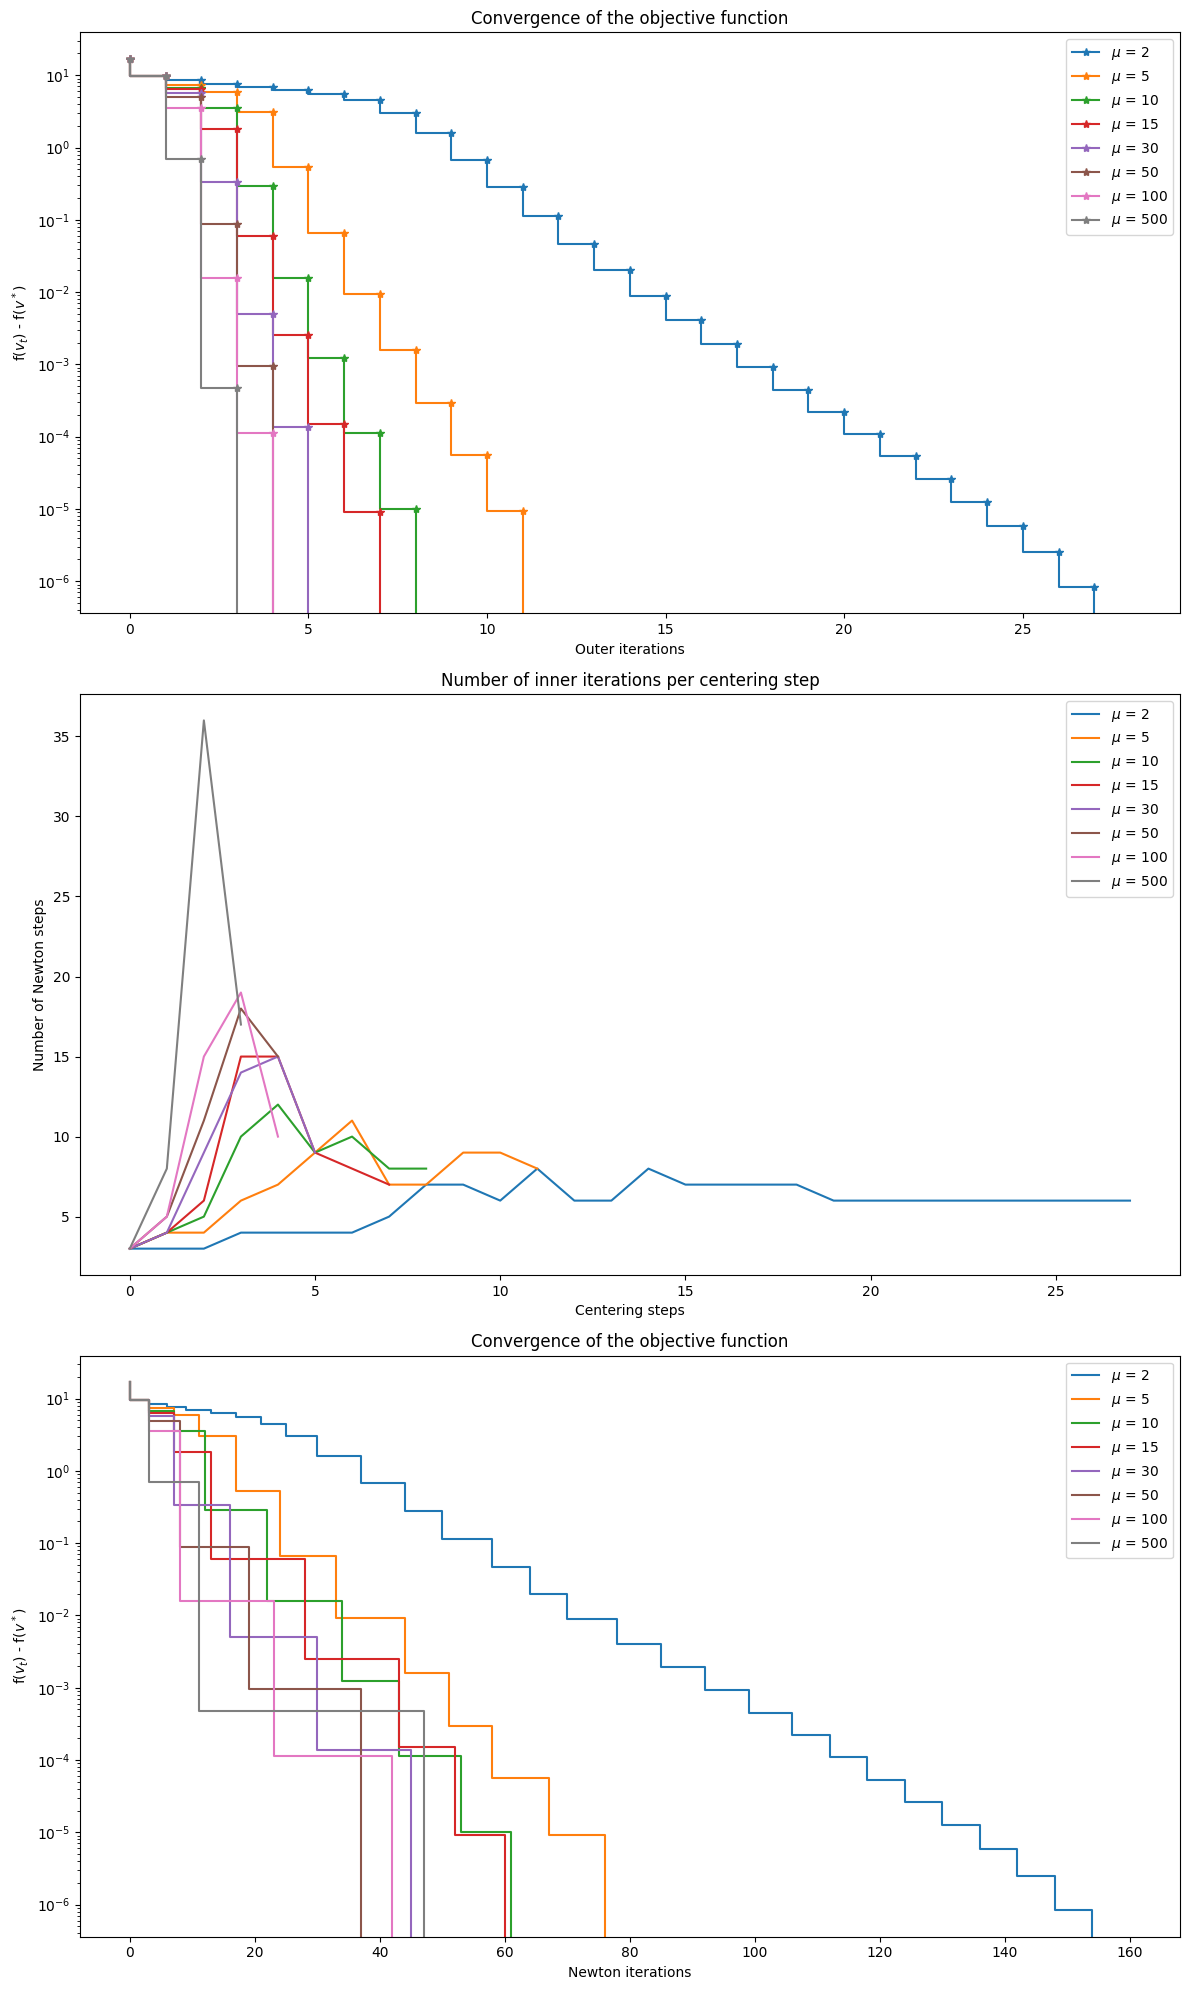

In [13]:
mu_seq = [2, 5, 10, 15, 30, 50, 100, 500]
w_seq = []
total_iterations = []

fig, ax = plt.subplots(3, 1, figsize=(12, 20))

for mu in mu_seq:
    
    v_seq, inner_it, outer_it = barrier_method(v0, Q, p, A, b, t, mu, eps, alpha, beta)
    print("mu = ", mu, ", number of outer iterations = ", outer_it)
    f_seq = [f_original(v, Q, p).flatten() for v in v_seq]

    total_newton_iterations = []
    total_newton_iterations.append(f_seq[0])
    for i in range(len(inner_it)):
        total_newton_iterations.extend([f_seq[i+1]]*inner_it[i])
    total_iterations.append(len(total_newton_iterations))
    
    # Impact on the primal objective
    w_seq.append(np.linalg.pinv(X).dot(y+v_seq[-1]))

    # Plots
    ax[0].step(range(len(v_seq)), np.abs(f_seq-f_original(v_seq[-1], Q, p)), '*-', label='$\mu$ = {}'.format(mu))
    ax[0].set_yscale('log')
    ax[0].set_xlabel('Outer iterations')
    ax[0].set_ylabel('f($v_t$) - f($v^*$)')
    ax[0].set_title('Convergence of the objective function')
    ax[0].legend()
    ax[1].plot(range(len(inner_it)), inner_it, label='$\mu$ = {}'.format(mu))
    ax[1].set_xlabel('Centering steps')
    ax[1].set_ylabel('Number of Newton steps')
    ax[1].set_title('Number of inner iterations per centering step')
    ax[1].legend()
    ax[2].step(range(len(total_newton_iterations)), np.abs(total_newton_iterations-f_original(v_seq[-1], Q, p)), label='$\mu$ = {}'.format(mu))
    ax[2].set_yscale('log')
    ax[2].set_xlabel('Newton iterations')
    ax[2].set_ylabel('f($v_t$) - f($v^*$)')
    ax[2].set_title('Convergence of the objective function')
    ax[2].legend()
plt.tight_layout()
plt.show()

    

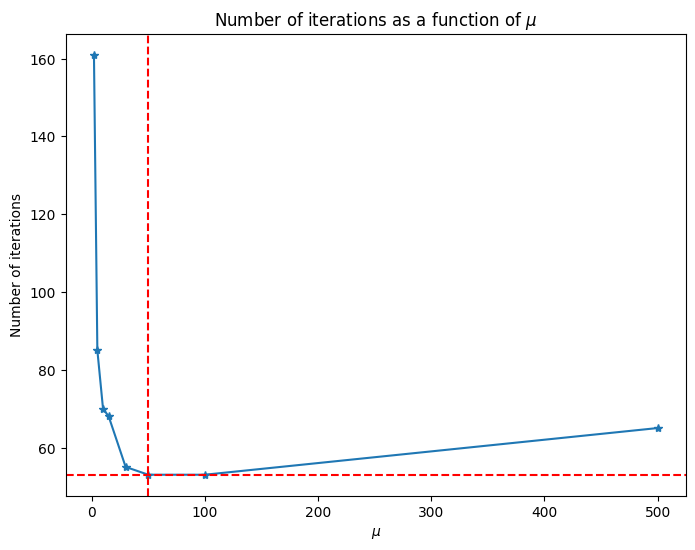

In [14]:
# Plot the number of iterations as a function of mu
plt.figure(figsize=(8, 6))
plt.plot(mu_seq, total_iterations, '*-')
plt.xlabel('$\mu$')
plt.ylabel('Number of iterations')
plt.title('Number of iterations as a function of $\mu$')
plt.axvline(x=50, color='r', linestyle='--')
plt.axhline(y=total_iterations[5], color='r', linestyle='--')
plt.show()

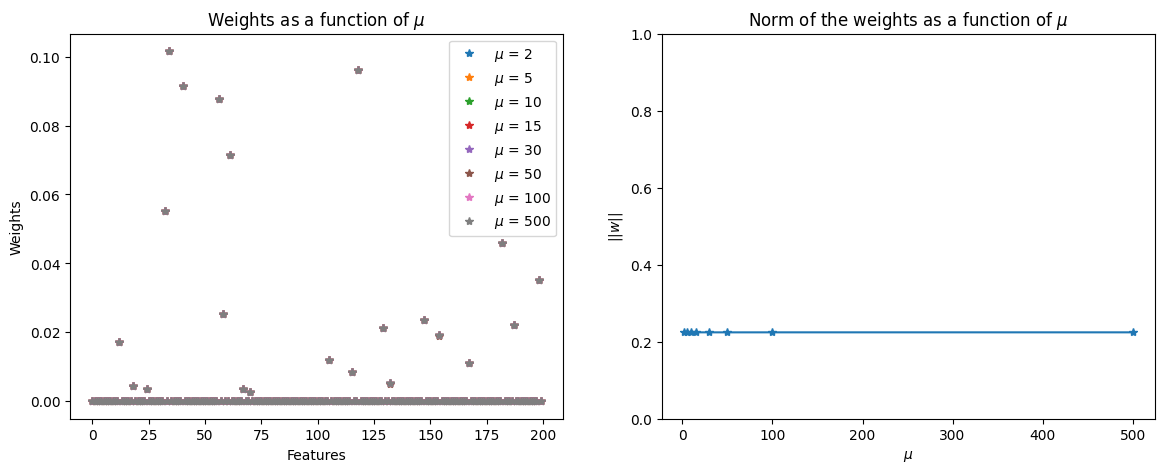

<Figure size 800x600 with 0 Axes>

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

for i in range(len(w_seq)):
    ax[0].plot(w_seq[i], '*', label='$\mu$ = {}'.format(mu_seq[i]))
ax[0].set_xlabel('Features')
ax[0].set_ylabel('Weights')
ax[0].set_title('Weights as a function of $\mu$')
ax[0].legend()

# Norm of the weights
norm_w = [np.linalg.norm(w) for w in w_seq]

plt.figure(figsize=(8, 6))
ax[1].plot(mu_seq, norm_w, '*-')
ax[1].set_xlabel('$\mu$')
ax[1].set_ylabel('$||w||$')
ax[1].set_title('Norm of the weights as a function of $\mu$')
ax[1].set_ylim([0, 1])

plt.show()
